In [21]:
# import pickle
# #main 1: save a variable
# with open('pickle.results', 'wb') as f: # must be wb for "write binary"
#     n = 100
#     pickle.dump(n, f)
    
# # restore a variable
# with open('pickle.results', 'rb') as f:
#     a = pickle.load(f)

# print(a)

In [22]:




# importing the custom classes i built
from matrix_class import ProteinMatrix # ppi matrix 
from cluster_class import AllClusters # dictionary to hold all clusters (in form number of cluster : list of proteins in that cluster)
from degreelist_class import DegreeList # creates a list of all proteins in order of their degree

# helper functions for setting up program
from recipe_utils import initialize_matrix_clusters_degreelist

In [23]:
from matrix_class import SubMatrix

def get_cluster_connectivity (
    matrix:ProteinMatrix,
    degreelist:DegreeList,
    clusters:AllClusters,
    added_proteins:dict={},
    percentages:bool=True,
    sort_it:bool=False,


):
    """
    returns a dictionary of cluster_num : percent_connectivity
    note: uses SubMatrix from matrix class

    can specify if you want sorted.
    if added_proteins is specified (not empty), then it will add those proteins to the cluster before calculating connectivity

    """
    proteins = matrix.get_list_of_proteins()
    degree_dict = dict(degreelist.sorted_protein_degree_dict)
    matrix_df = matrix.get_matrix()
    cluster_connectivity = {}

    for cluster_num in clusters.get_all_cluster_labels():
        # get all the proteins associated to a cluster  
        cluster_proteins = clusters.get_cluster_proteins(cluster_num)
        
        # added_cluster_proteins is empty in the case that none have been added, or if added proteins was not specified
        added_cluster_proteins = [] if not added_proteins or cluster_num not in added_proteins else added_proteins[cluster_num]
        # get the list of potential proteins to add to cluster 
        submatrix = SubMatrix(list(set(cluster_proteins + added_cluster_proteins)), matrix)
        components_and_labels = submatrix.get_num_components_and_labels()
        num_components = components_and_labels[0]
        # current ratio of clusters to proteins
        if (percentages):
            num_proteins = len(cluster_proteins)
        
            percent_connectivity = 1 - (num_components - 1) / (num_proteins - 1)
            cluster_connectivity[cluster_num] = percent_connectivity
        else:
            cluster_connectivity[cluster_num] = num_components

    if sort_it:
        sorted_cluster_connectivity:dict= {k: v for k, v in sorted(cluster_connectivity.items(), key=lambda item: item[1], reverse=False)}
        return sorted_cluster_connectivity
    
    return cluster_connectivity






In [24]:
# interactions_file = "data/connectivity/1_ppi_anonym_v2.txt"
# clusters_file = "data/connectivity/1_clusters_s1000_split.json"

interactions_file = "data/connectivity/test_interactions"
clusters_file = "data/connectivity/test_clusters"


In [25]:

# import json

# clusterjson = {}
# with open("data/connectivity/1_clusters_s1000_split.txt") as f:
#     for line in f:
#         parts = line.strip().split('\t')
#         cluster = int(parts[0])
#         for prot in parts[2:]:
#              clusterjson[prot] = cluster

# with open(clusters_file, "w") as outfile:
#     json.dump(clusterjson, outfile)
    



In [26]:
matrix, clusters, degreelist = initialize_matrix_clusters_degreelist(interactions_filepath=interactions_file, clusters_filepath=clusters_file)


# new_clusters=AllClusters(protein_to_cluster_dict=filtered_dict)    

In [27]:
from matrix_class import SubMatrix

for key in clusters.get_all_cluster_labels():
    print(SubMatrix(clusters.get_cluster_proteins(key), matrix).get_matrix())

matrix


     p2   p1   p3
p2  0.0  0.1  0.1
p1  0.1  0.0  0.1
p3  0.1  0.1  0.0
     p6   p5   p4
p6  0.0  0.0  0.0
p5  0.0  0.0  0.0
p4  0.0  0.0  0.0
      p7   p9   p8  p10
p7   0.0  0.0  0.2  0.0
p9   0.0  0.0  0.0  0.2
p8   0.2  0.0  0.0  0.0
p10  0.0  0.2  0.0  0.0


      p1  p10   p2   p3   p4   p5   p6   p7   p8   p9
p1   0.0  0.0  0.1  0.1  0.1  0.1  0.1  0.0  0.0  0.0
p10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.2
p2   0.1  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0
p3   0.1  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0
p4   0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
p5   0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
p6   0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
p7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.2  0.0
p8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.2  0.0  0.0
p9   0.0  0.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

printing the connectivity dictionary
{1: 1, 2: 3, 3: 2}


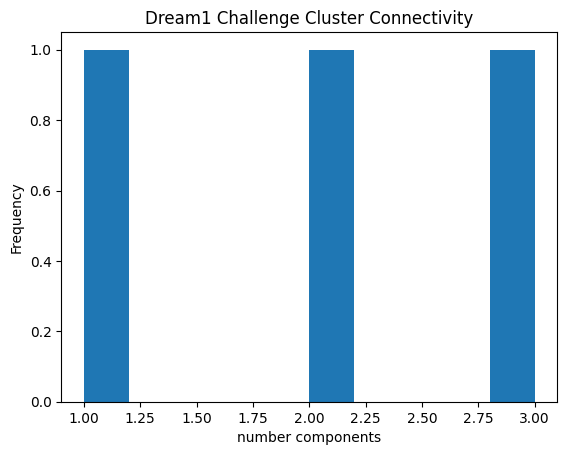

In [28]:

import matplotlib.pyplot as plt

num_components_dict = get_cluster_connectivity(matrix, degreelist, clusters, percentages=False, sort_it=False)
print(f"printing the connectivity dictionary")
print(num_components_dict)

values = list(num_components_dict.values())

# Creating histogram
plt.hist(values)

# Adding labels and title
plt.xlabel('number components')
plt.ylabel('Frequency')
plt.title('Dream1 Challenge Cluster Connectivity')

# Displaying the histogram
plt.show()

printing the connectivity dictionary


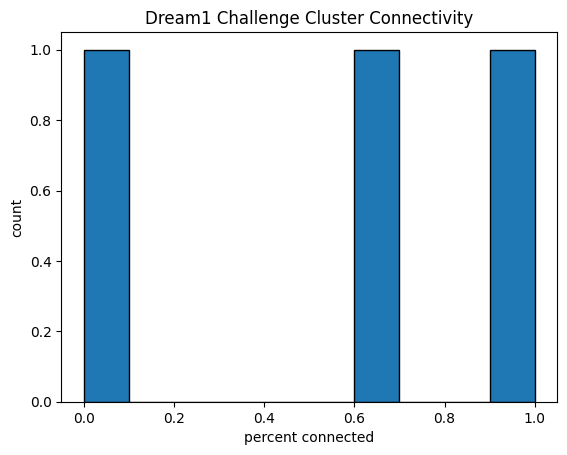

Number of values greater than 0.9: 1


{1: 1.0, 2: 0.0, 3: 0.6666666666666667}

In [29]:

import numpy as np

percent_components_dict = get_cluster_connectivity(matrix, degreelist, clusters, percentages=True, sort_it=False)

print(f"printing the connectivity dictionary")
values = list(percent_components_dict.values())

x_range = (0, 1)  # Range of x values
bucket_size = .1  # Size of each bucket

bins = np.arange(x_range[0], x_range[1] + bucket_size, bucket_size)

# Creating histogram with adjusted range and bucket size
plt.hist(values, bins=bins, edgecolor='black')


# Adding labels and title
plt.xlabel('percent connected')
plt.ylabel('count')
plt.title('Dream1 Challenge Cluster Connectivity')

# Displaying the histogram
plt.show()


print("Number of values greater than 0.9:", sum(value > 0.9 for value in percent_components_dict.values()))
# print(f"number of functionally enriched clusters (modules) out of {clusters.get_num_clusters()} original clusters: {original_fe.enrichment['Module'].nunique()}")
percent_components_dict

In [30]:
clusters.print_all()


dict_keys([1, 2, 3])
Cluster 1: ['p1', 'p2', 'p3']
Cluster 2: ['p4', 'p5', 'p6']
Cluster 3: ['p7', 'p8', 'p9', 'p10']


In [31]:
clusters.sort_dictionary()
clusters.print_all()

dict_keys([1, 2, 3])
Cluster 1: ['p1', 'p2', 'p3']
Cluster 2: ['p4', 'p5', 'p6']
Cluster 3: ['p7', 'p8', 'p9', 'p10']


In [32]:
min_size = 3
max_size = 8
filtered_dict = {key: value for key, value in clusters.get_all_clusters().items() if min_size <= len(value) <= max_size}
filtered_dict

{1: ['p1', 'p2', 'p3'], 2: ['p4', 'p5', 'p6'], 3: ['p7', 'p8', 'p9', 'p10']}

In [33]:
from matrix_class import SubMatrix


for key in filtered_dict:
    print(SubMatrix(filtered_dict[key], matrix).get_matrix())

matrix


     p2   p1   p3
p2  0.0  0.1  0.1
p1  0.1  0.0  0.1
p3  0.1  0.1  0.0
     p6   p5   p4
p6  0.0  0.0  0.0
p5  0.0  0.0  0.0
p4  0.0  0.0  0.0
      p7   p9   p8  p10
p7   0.0  0.0  0.2  0.0
p9   0.0  0.0  0.0  0.2
p8   0.2  0.0  0.0  0.0
p10  0.0  0.2  0.0  0.0


      p1  p10   p2   p3   p4   p5   p6   p7   p8   p9
p1   0.0  0.0  0.1  0.1  0.1  0.1  0.1  0.0  0.0  0.0
p10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.2
p2   0.1  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0
p3   0.1  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0
p4   0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
p5   0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
p6   0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
p7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.2  0.0
p8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.2  0.0  0.0
p9   0.0  0.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0